In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'..\data\processed\Canada.csv')

df

,Year,"Population, male (% of total population)","Population, male","Population, female (% of total population)","Population, female","Population, total",Population growth (annual %),"Age dependency ratio, young (% of working-age population)","Age dependency ratio, old (% of working-age population)",Age dependency ratio (% of working-age population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Refugee population by country or territory of asylum,Net migration,"Physicians (per 1,000 people)","Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Number of neonatal deaths,Number of under-five deaths,Number of infant deaths
0,1961,50.518259,9230191,49.481741,9040809,18271000,1.999185,57.997443,13.148538,71.145981,...,55.546,44492,24186,1.1000,35.2,27.7,31.5,NaN,14726,12582
1,1962,50.448813,9390542,49.551192,9223459,18614000,1.859888,58.088118,13.163742,71.251860,...,52.370,12282,26210,1.2000,34.0,26.8,30.5,NaN,14127,12032
2,1963,50.381390,9554327,49.618610,9409673,18964000,1.862846,57.859900,13.143824,71.003724,...,50.662,10946,40913,1.3000,32.8,25.7,29.4,NaN,13490,11460
3,1964,50.321204,9724573,49.678790,9600426,19325000,1.885715,57.306955,13.112797,70.419752,...,48.539,10178,58965,1.3000,31.6,24.8,28.2,NaN,12758,10804
4,1965,50.268043,9891746,49.731957,9786254,19678000,1.810167,56.439516,13.088879,69.528395,...,47.892,9980,103588,1.3000,30.2,23.9,27.1,NaN,11684,9818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2017,49.632517,18138320,50.367480,18406915,36545236,1.199521,24.124458,25.023597,49.148056,...,8.054,104768,361274,2.6102,5.6,4.9,5.3,1299.0,1962,1712
57,2018,49.657362,18405543,50.342638,18659541,37065084,1.412456,24.098516,25.703142,49.801657,...,7.094,114101,417974,2.4280,5.6,4.9,5.2,1275.0,1941,1697
58,2019,49.679793,18680213,50.320210,18921018,37601230,1.436137,24.052564,26.424826,50.477390,...,6.888,101757,391914,2.4350,5.5,4.8,5.2,1251.0,1897,1659
59,2020,49.689062,18885404,50.310938,19121762,38007166,1.073796,24.001803,27.253896,51.255699,...,6.985,109214,195181,2.4330,5.5,4.7,5.1,1271.0,1878,1645


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 86 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           61 non-null     int64  
 1   Population, male (% of total population)                       61 non-null     float64
 2   Population, male                                               61 non-null     int64  
 3   Population, female (% of total population)                     61 non-null     float64
 4   Population, female                                             61 non-null     int64  
 5   Population, total                                              61 non-null     int64  
 6   Population growth (annual %)                                   61 non-null     float64
 7   Age dependency ratio, young (% of working-age population)      6

In [4]:
df.head()

,Year,"Population, male (% of total population)","Population, male","Population, female (% of total population)","Population, female","Population, total",Population growth (annual %),"Age dependency ratio, young (% of working-age population)","Age dependency ratio, old (% of working-age population)",Age dependency ratio (% of working-age population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Refugee population by country or territory of asylum,Net migration,"Physicians (per 1,000 people)","Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Number of neonatal deaths,Number of under-five deaths,Number of infant deaths
0,1961,50.518259,9230191,49.481741,9040809,18271000,1.999185,57.997443,13.148538,71.145981,...,55.546,44492,24186,1.1,35.2,27.7,31.5,NaN,14726,12582
1,1962,50.448813,9390542,49.551192,9223459,18614000,1.859888,58.088118,13.163742,71.251860,...,52.370,12282,26210,1.2,34.0,26.8,30.5,NaN,14127,12032
2,1963,50.381390,9554327,49.618610,9409673,18964000,1.862846,57.859900,13.143824,71.003724,...,50.662,10946,40913,1.3,32.8,25.7,29.4,NaN,13490,11460
3,1964,50.321204,9724573,49.678790,9600426,19325000,1.885715,57.306955,13.112797,70.419752,...,48.539,10178,58965,1.3,31.6,24.8,28.2,NaN,12758,10804
4,1965,50.268043,9891746,49.731957,9786254,19678000,1.810167,56.439516,13.088879,69.528395,...,47.892,9980,103588,1.3,30.2,23.9,27.1,NaN,11684,9818


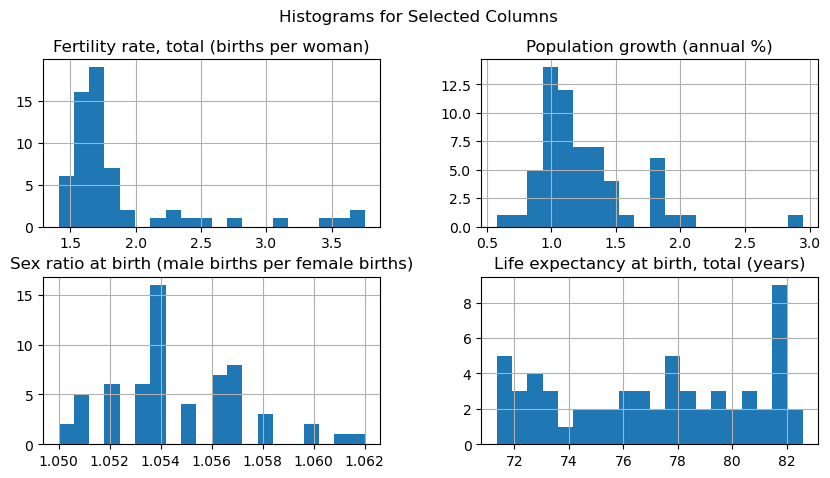

In [4]:
columns_of_interest = ["Fertility rate, total (births per woman)", "Population growth (annual %)", "Sex ratio at birth (male births per female births)", "Life expectancy at birth, total (years)"]
df_selected = df[columns_of_interest]

df_selected.hist(figsize=(10, 5), bins=20)
plt.suptitle('Histograms for Selected Columns')
plt.show()


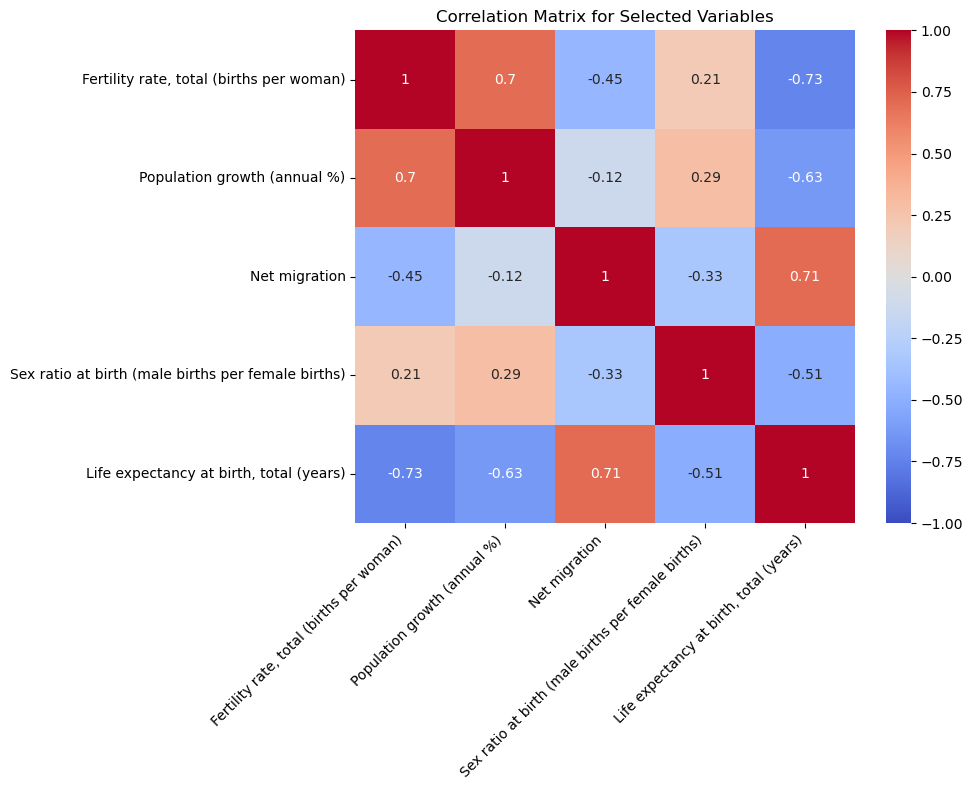

In [5]:
relevant_columns = [
    'Fertility rate, total (births per woman)', 
    'Population growth (annual %)', 
    'Net migration',
    'Sex ratio at birth (male births per female births)',
    'Life expectancy at birth, total (years)'
]
df_selected = df[relevant_columns]

correlation_matrix = df_selected.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Selected Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [73]:
# Load the data, skipping the first three rows
df = pd.read_csv(r'..\data\raw\raw_data.csv', skiprows=3)

# Filter rows based on the 'Indicator Name' column
filtered_df = df[df['Indicator Name'].isin([
    'Population growth (annual %)', 
    'Fertility rate, total (births per woman)', 
    'Net migration'
])]

# Select only the relevant columns
df_selected = filtered_df[['Country Name', 'Indicator Name', '2021.0']]

# Pivot the DataFrame to have 'Country Name' as the index
df_pivot = df_selected.pivot_table(index='Country Name', columns='Indicator Name', values='2021.0')

# Reset the index to make 'Country Name' a column again
df_pivot = df_pivot.reset_index()

print(df_pivot.head())

Indicator Name                 Country Name  \
0                               Afghanistan   
1               Africa Eastern and Southern   
2                Africa Western and Central   
3                                   Albania   
4                                   Algeria   

Indicator Name  Fertility rate, total (births per woman)  Net migration  \
0                                               4.643000      -183672.0   
1                                               4.354709      -179444.0   
2                                               4.978662      -264802.0   
3                                               1.390000       -10612.0   
4                                               2.889000       -18797.0   

Indicator Name  Population growth (annual %)  
0                                   2.851358  
1                                   2.607472  
2                                   2.573377  
3                                  -0.926918  
4                              

In [74]:
df_pivot

Indicator Name,Country Name,"Fertility rate, total (births per woman)",Net migration,Population growth (annual %)
0,Afghanistan,4.643000,-183672.0,2.851358
1,Africa Eastern and Southern,4.354709,-179444.0,2.607472
2,Africa Western and Central,4.978662,-264802.0,2.573377
3,Albania,1.390000,-10612.0,-0.926918
4,Algeria,2.889000,-18797.0,1.657703
...,...,...,...,...
252,Uzbekistan,3.173000,-39201.0,1.975706
253,"Venezuela, RB",2.211000,-525116.0,-1.025179
254,Viet Nam,1.944000,-992.0,0.844182
255,Virgin Islands (U.S.),2.010000,-224.0,-0.395928


In [76]:
print(df_pivot.columns)

Index(['Country Name', 'Fertility rate, total (births per woman)',
       'Net migration', 'Population growth (annual %)'],
      dtype='object', name='Indicator Name')


In [77]:
df_pivot.to_csv(r'../data/processed/pivot_table.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


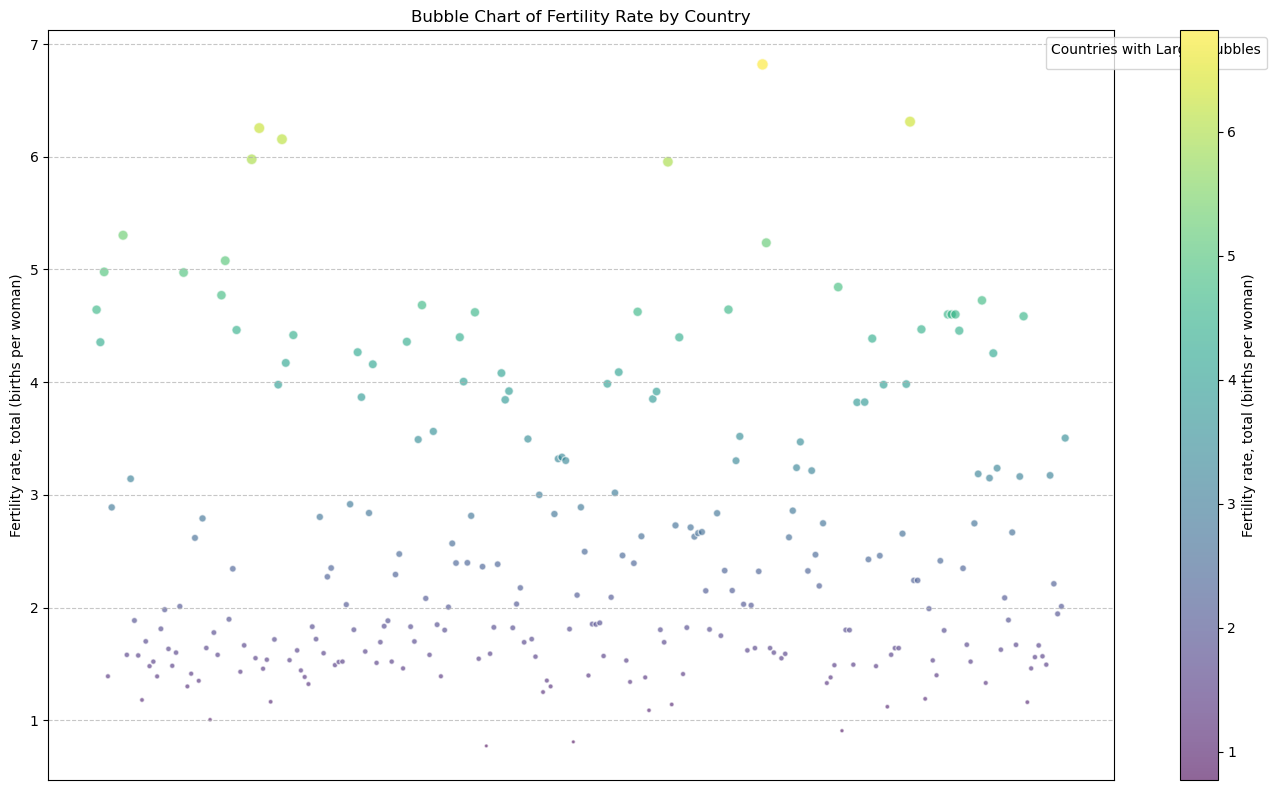

In [100]:
# Create a bubble chart
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    df.index,  # Use index for x-axis to hide labels
    df['Fertility rate, total (births per woman)'],  # y-axis: Fertility rate
    s=df['Fertility rate, total (births per woman)'] * 10,  # Bubble size
    alpha=0.6,
    edgecolors='w',
    c=df['Fertility rate, total (births per woman)'],  # Color by Fertility rate
    cmap='viridis'  # Use a color map
)

plt.xticks([])  # Remove x-axis labels
plt.xlabel('')  # Remove x-axis label
plt.ylabel('Fertility rate, total (births per woman)')
plt.title('Bubble Chart of Fertility Rate by Country')

# Remove vertical grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a color bar
plt.colorbar(scatter, label='Fertility rate, total (births per woman)')

# Add a legend only for larger bubbles
# You can filter out smaller bubbles for legend creation
plt.legend(
    loc='upper right',
    bbox_to_anchor=(1.15, 1),
    title='Countries with Larger Bubbles'
)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('bubble_chart_matplotlib.png')

# Show the plot
plt.show()

In [109]:
import pandas as pd
import plotly.express as px

# Check for NaN values
print(df.isna().sum())

# Remove rows with NaN values
df_cleaned = df.dropna(subset=['Fertility rate, total (births per woman)'])

# Alternatively, fill NaN values with a default value, e.g., 0
# df['Fertility rate, total (births per woman)'].fillna(0, inplace=True)


Country Name                                0
Fertility rate, total (births per woman)    7
Net migration                               0
Population growth (annual %)                0
dtype: int64


In [118]:
# Create the bubble chart using Plotly
fig = px.scatter(
    df_cleaned,
    x=df_cleaned.index,  # Use index for x-axis to hide labels
    y='Fertility rate, total (births per woman)',
    size='Fertility rate, total (births per woman)',  # Bubble size
    color='Fertility rate, total (births per woman)',  # Color by Fertility rate
    hover_name='Country Name',
    title='Bubble Chart of Fertility Rate by Country',
    template='plotly_dark',
    color_continuous_scale='Viridis'  # Use a color scale
)

# Add trend line for 'Population growth (annual %)'
fig.add_scatter(
    x=df_cleaned.index,
    y=df_cleaned['Population growth (annual %)'],
    mode='lines+markers',
    name='Population Growth Trend',
    line=dict(color='cyan', width=2, dash='dash'),
    marker=dict(size=10, color='cyan')
)

# Customize the layout
fig.update_layout(
    xaxis_title='',
    yaxis_title='Fertility rate, total (births per woman)',
    xaxis=dict(
        showticklabels=False,  # Hide x-axis labels
        showgrid=False  # Optional: Hide x-axis grid lines
    ),
    yaxis=dict(showgrid=True),  # Optional: Keep y-axis grid lines
    coloraxis_colorbar=dict(
        title='',
        tickvals=[df_cleaned['Fertility rate, total (births per woman)'].min(), df_cleaned['Fertility rate, total (births per woman)'].max()],
        ticktext=['Low', 'High']
    )
)

# # Add annotations for significant countries
# significant_countries = ['Afghanistan', 'Albania', 'Algeria']  # Customize as needed
# for country in significant_countries:
#     country_data = df_cleaned[df_cleaned['Country Name'] == country]
#     fig.add_scatter(
#         x=country_data.index,
#         y=country_data['Fertility rate, total (births per woman)'],
#         mode='markers',
#         marker=dict(size=country_data['Fertility rate, total (births per woman)'] * 10, color='red'),
#         name=country
#     )

# Show the plot
fig.show()

# Save the plot as an HTML file
fig.write_html('bubble_chart_plotly_enhanced.html')
